In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Numpy Bölümü

#### Numpy ile Matris İşlemleri
##### - 5x5 boyutunda rastgele (0-100 arasında) tam sayılardan oluşan bir matris oluşturun.
##### - Bu matrisin:
######  • Ortalama, standart sapma ve varyansını hesaplayın.
######  • En büyük ve en küçük değerlerini bulun.
######  • Köşegenindeki elemanların toplamını bulun.

In [174]:
# 5x5 boyutunda 0-100 arasında rastgele tam sayılardan oluşan matris oluşturalım
matris = np.random.randint(0,101,(5,5))
print("Matris:\n", matris)

# Ortalama, standart sapma, varyans değerlerini hesaplayalım 
ortalama = np.mean(matris)
std_sapma = np.std(matris)
varyans = np.var(matris)

print("\nOrtalama:", ortalama)
print("Standart Sapma:", std_sapma)
print("Varyans:", varyans)

# En büyük ve en küçük değerleri bulalım
en_buyuk = np.max(matris)
en_kucuk = np.min(matris)

print("\nEn Büyük Değer:", en_buyuk)
print("En Küçük Değer:", en_kucuk)

# Köşegen elemanlarının toplamını bulalım
kosegen_toplam = np.trace(matris)
print("\nKöşegen Toplamı:", kosegen_toplam)

Matris:
 [[99 37 92 74 87]
 [11 29 30 82 32]
 [44 43 41 29 81]
 [ 3 29 13 11 44]
 [60 25 38 65 67]]

Ortalama: 46.64
Standart Sapma: 27.00648810934143
Varyans: 729.3504

En Büyük Değer: 99
En Küçük Değer: 3

Köşegen Toplamı: 247


#### Numpy ile Veri Simülasyonu
##### 1000 adet öğrencinin sınav puanlarını (0-100 arası, normal dağılımdan gelen) simüle edin.
###### - Ortalama, medyan ve standart sapmayı hesaplayın.
###### - 50’den düşük alan kaç öğrenci olduğunu bulun.

In [177]:
# 1000 öğrencinin sınav puanlarını normal dağılımdan üretelim
# Ortalama = 50, Standart Sapma = 15
puanlar = np.random.normal(loc=50, scale=15, size=1000)

# Puanları 0-100 aralığına kısıtlayalım
puanlar = np.clip(puanlar, 0, 100)

# Ortalama, medyan ve standart sapma hesaplayalım
ortalama = np.mean(puanlar)
medyan = np.median(puanlar)
std_sapma = np.std(puanlar)

# 50’den düşük alan kaç öğrenci var bulalım
elli_altinda = np.sum(puanlar < 50)

print("Ortalama:", ortalama)
print("Medyan:", medyan)
print("Standart Sapma:", std_sapma)
print("50’den düşük alan öğrenci sayısı:", elli_altinda)

Ortalama: 50.1492884856374
Medyan: 49.79021658926912
Standart Sapma: 15.00444002351262
50’den düşük alan öğrenci sayısı: 510


# Pandas Bölümü

#### • Görevler:
##### 1. Veri setini Pandas DataFrame olarak oluşturun.
##### 2. Her ders için ortalama puanı bulun.
##### 3. En yüksek matematik notunu alan öğrenciyi bulun.
##### 4. Her öğrencinin not ortalamasını hesaplayan yeni bir sütun ekleyin.
##### 5. Bölümlere göre gruplayarak her bölümün ortalama başarılarını hesaplayın.
##### 6. Ortalaması 70’in üzerinde olan öğrencileri filtreleyin.

In [181]:
#  DataFrame oluşturalım
data = {
    "Öğrenci": ["Ali", "Ayşe", "Mehmet", "Zeynep", "Ahmet"],
    "Yaş": [20, 21, 19, 22, 20],
    "Bölüm": ["Bilgisayar", "Fizik", "Kimya", "Bilgisayar", "Fizik"],
    "Matematik": [70, 60, 80, 90, 55],
    "Fizik": [65, 75, 70, 85, 60],
    "Kimya": [80, 85, 65, 95, 70]
}
df = pd.DataFrame(data)
df

,Öğrenci,Yaş,Bölüm,Matematik,Fizik,Kimya
0,Ali,20,Bilgisayar,70,65,80
1,Ayşe,21,Fizik,60,75,85
2,Mehmet,19,Kimya,80,70,65
3,Zeynep,22,Bilgisayar,90,85,95
4,Ahmet,20,Fizik,55,60,70


In [182]:
# Her ders için ortalama puanı bulalım
ders_ortalamalari = df[["Matematik", "Fizik", "Kimya"]].mean()
ders_ortalamalari

Matematik    71.0
Fizik        71.0
Kimya        79.0
dtype: float64

In [185]:
# En yüksek matematik notunu alan öğrenciyi bulalım 
en_yuksek_mat = df.loc[df["Matematik"].idxmax(), "Öğrenci"]
en_yuksek_mat

'Zeynep'

In [187]:
# Her öğrencinin not ortalamasını bulalım
df["Ortalama"] = df[["Matematik", "Fizik", "Kimya"]].mean(axis=1)
ortalama_df = df[["Öğrenci", "Ortalama"]]
ortalama_df

,Öğrenci,Ortalama
0,Ali,71.666667
1,Ayşe,73.333333
2,Mehmet,71.666667
3,Zeynep,90.000000
4,Ahmet,61.666667


In [189]:
# Bölümlere göre ortalama başarıyı bulalım
bolum_ort = df.groupby("Bölüm")[["Matematik", "Fizik", "Kimya", "Ortalama"]].mean()
bolum_ort

,Matematik,Fizik,Kimya,Ortalama
Bölüm,,,,
Bilgisayar,80.0,75.0,87.5,80.833333
Fizik,57.5,67.5,77.5,67.500000
Kimya,80.0,70.0,65.0,71.666667


In [191]:
# Ortalaması 70’in üzerinde olan öğrencileri bulalım 
basarili_ogr = df[df["Ortalama"] > 70]
basarili_ogr

,Öğrenci,Yaş,Bölüm,Matematik,Fizik,Kimya,Ortalama
0,Ali,20,Bilgisayar,70,65,80,71.666667
1,Ayşe,21,Fizik,60,75,85,73.333333
2,Mehmet,19,Kimya,80,70,65,71.666667
3,Zeynep,22,Bilgisayar,90,85,95,90.000000


# Ek Görev 

#### Matplotlib veya Seaborn kullanarak:
##### • Her dersin dağılımını histogram ile gösterin.
##### • Bölümlere göre ortalamaları bar grafikte görselleştirin.

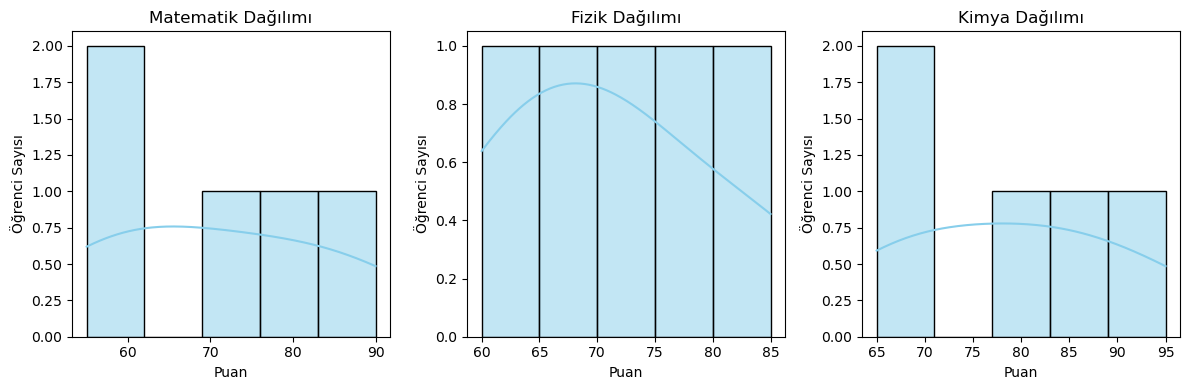

In [195]:
# Histogram: Derslerin puan dağılımı
plt.figure(figsize=(12, 4))
dersler = ["Matematik", "Fizik", "Kimya"]

for i, ders in enumerate(dersler):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[ders], bins=5, kde=True, color='skyblue')
    plt.title(f"{ders} Dağılımı")
    plt.xlabel("Puan")
    plt.ylabel("Öğrenci Sayısı")

plt.tight_layout()
plt.show()


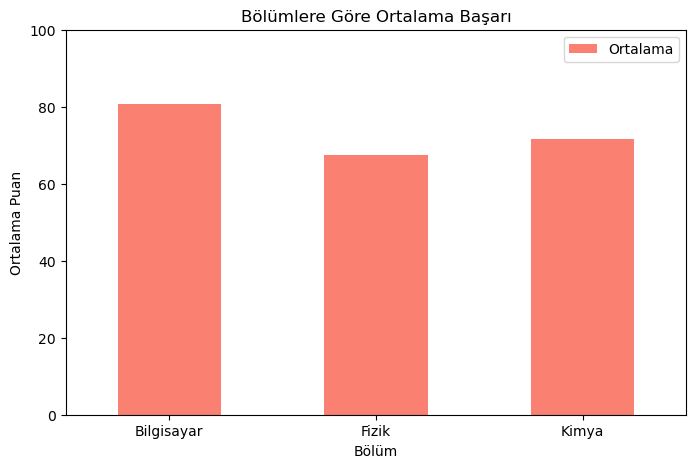

In [196]:
# Bar Grafiği: Bölümlere göre ortalama başarı
bolum_ort = df.groupby("Bölüm")[["Ortalama"]].mean()

bolum_ort.plot(kind='bar', figsize=(8, 5), color='salmon')
plt.title("Bölümlere Göre Ortalama Başarı")
plt.ylabel("Ortalama Puan")
plt.xticks(rotation=0)
plt.ylim(0, 100) 
plt.show()